In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
train_df = pd.read_csv("Auto_Insurance_Fraud_Claims_File01.csv")
test_df = pd.read_csv("Auto_Insurance_Fraud_Claims_File02.csv")
val_df = pd.read_csv("Auto_Insurance_Fraud_Claims_File03.csv")
submission_df = pd.read_csv("Auto_Insurance_Fraud_Claims_Results_Submission.csv")

In [3]:
# Show dataset shapes
print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)
print("Validation Shape:", val_df.shape)

Train Shape: (40000, 53)
Test Shape: (20000, 53)
Validation Shape: (10000, 52)


In [4]:
train_df.isnull().sum()

,0
Claim_ID,0
Bind_Date1,0
Customer_Life_Value1,0
Age_Insured,0
Policy_Num,0
Policy_State,0
Policy_Start_Date,0
Policy_Expiry_Date,0
Policy_BI,0
Policy_Ded,0


In [5]:
test_df.isnull().sum()

,0
Claim_ID,0
Bind_Date1,0
Customer_Life_Value1,0
Age_Insured,0
Policy_Num,0
Policy_State,0
Policy_Start_Date,0
Policy_Expiry_Date,0
Policy_BI,0
Policy_Ded,0


In [6]:
val_df.isnull().sum()

,0
Claim_ID,0
Bind_Date1,0
Customer_Life_Value1,0
Age_Insured,0
Policy_Num,0
Policy_State,0
Policy_Start_Date,0
Policy_Expiry_Date,0
Policy_BI,0
Policy_Ded,0


In [7]:
import pandas as pd
import numpy as np

# STEP 1: Clean column names
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")
    return df

train_df = clean_column_names(train_df)
test_df = clean_column_names(test_df)
val_df = clean_column_names(val_df)

# STEP 2: Binary column normalization
binary_map = {"Y": 1, "N": 0, "YES": 1, "NO": 0}
binary_columns = ["Fraud_Ind", "Property_Damage", "Police_Report",
                  "Low_Mileage_Discount", "Commute_Discount", "authorities_contacted"]

def process_binary_columns(df, columns):
    for col in columns:
        if col in df.columns:
            df[col] = df[col].replace(binary_map)
            df[col] = pd.to_numeric(df[col], errors="coerce")
            df[col] = df[col].fillna(-1).astype(int)  # use -1 to encode "missing"
    return df

train_df = process_binary_columns(train_df, binary_columns)
test_df = process_binary_columns(test_df, binary_columns)
val_df = process_binary_columns(val_df, binary_columns)

# STEP 3: Parse datetime columns (we may drop them later)
date_cols = ["Bind_Date1", "Policy_Start_Date", "Policy_Expiry_Date",
             "Accident_Date", "Claims_Date", "DL_Expiry_Date"]

for df in [train_df, test_df, val_df]:
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

# STEP 4: Fill missing values
def fill_remaining_missing(df):
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].fillna("Unknown")
        elif np.issubdtype(df[col].dtype, np.number):
            df[col] = df[col].fillna(df[col].median())
    return df

train_df = fill_remaining_missing(train_df)
test_df = fill_remaining_missing(test_df)
val_df = fill_remaining_missing(val_df)

# STEP 5: Remove duplicates
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)
val_df.drop_duplicates(inplace=True)



/tmp/ipython-input-7-3451007686.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(binary_map)
/tmp/ipython-input-7-3451007686.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(binary_map)
/tmp/ipython-input-7-3451007686.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sil

In [8]:
train_df.isnull().sum()

,0
Claim_ID,0
Bind_Date1,0
Customer_Life_Value1,0
Age_Insured,0
Policy_Num,0
Policy_State,0
Policy_Start_Date,0
Policy_Expiry_Date,0
Policy_BI,0
Policy_Ded,0


In [9]:
test_df.isnull().sum()

,0
Claim_ID,0
Bind_Date1,0
Customer_Life_Value1,0
Age_Insured,0
Policy_Num,0
Policy_State,0
Policy_Start_Date,0
Policy_Expiry_Date,0
Policy_BI,0
Policy_Ded,0


In [10]:
val_df.isnull().sum()

,0
Claim_ID,0
Bind_Date1,0
Customer_Life_Value1,0
Age_Insured,0
Policy_Num,0
Policy_State,0
Policy_Start_Date,0
Policy_Expiry_Date,0
Policy_BI,0
Policy_Ded,0


In [11]:
# STEP 6: Save cleaned datasets
train_df.to_csv("cleaned_train.csv", index=False)
test_df.to_csv("cleaned_test.csv", index=False)
val_df.to_csv("cleaned_val.csv", index=False)

print("✅ Cleaned datasets saved. Columns retained:", train_df.shape[1])


✅ Cleaned datasets saved. Columns retained: 53


Train shape: (40000, 53)
Test shape: (20000, 53)
Val shape: (10000, 52)

Sample:
      Claim_ID  Bind_Date1  Customer_Life_Value1  Age_Insured  Policy_Num  \
0  AA00000001  2023-01-01                    12           28   123790687   
1  AA00000002  2023-01-01                    12           31   129044473   
2  AA00000003  2022-07-01                    18           50   146863149   
3  AA00000004  2023-01-01                    12           37   163100869   
4  AA00000005  2022-03-01                    22           28   185582958   

  Policy_State Policy_Start_Date Policy_Expiry_Date Policy_BI  Policy_Ded  \
0           OH        2023-10-13         2024-04-13  500/1000        1000   
1           IL        2023-10-21         2024-04-21   250/500         500   
2           OH        2023-11-26         2024-05-26  500/1000         500   
3           IL        2023-08-08         2024-02-08  500/1000        1000   
4           OH        2023-11-12         2024-05-12   250/500        1000   

/tmp/ipython-input-12-1046159122.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Fraud_Ind", data=train_df, palette="Set2")


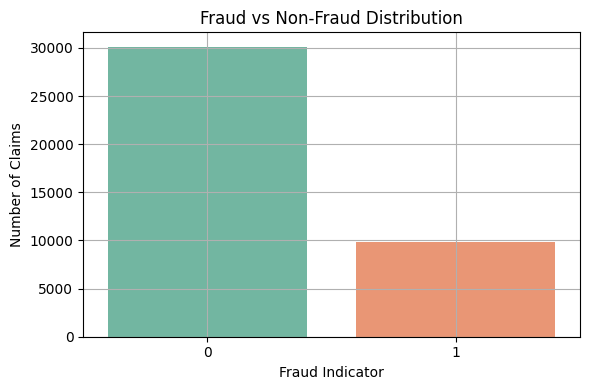

Fraud Class Distribution (%):
Fraud_Ind
0    75.3
1    24.7
Name: proportion, dtype: float64
⚠️ Class imbalance detected — consider SMOTE or ADASYN.


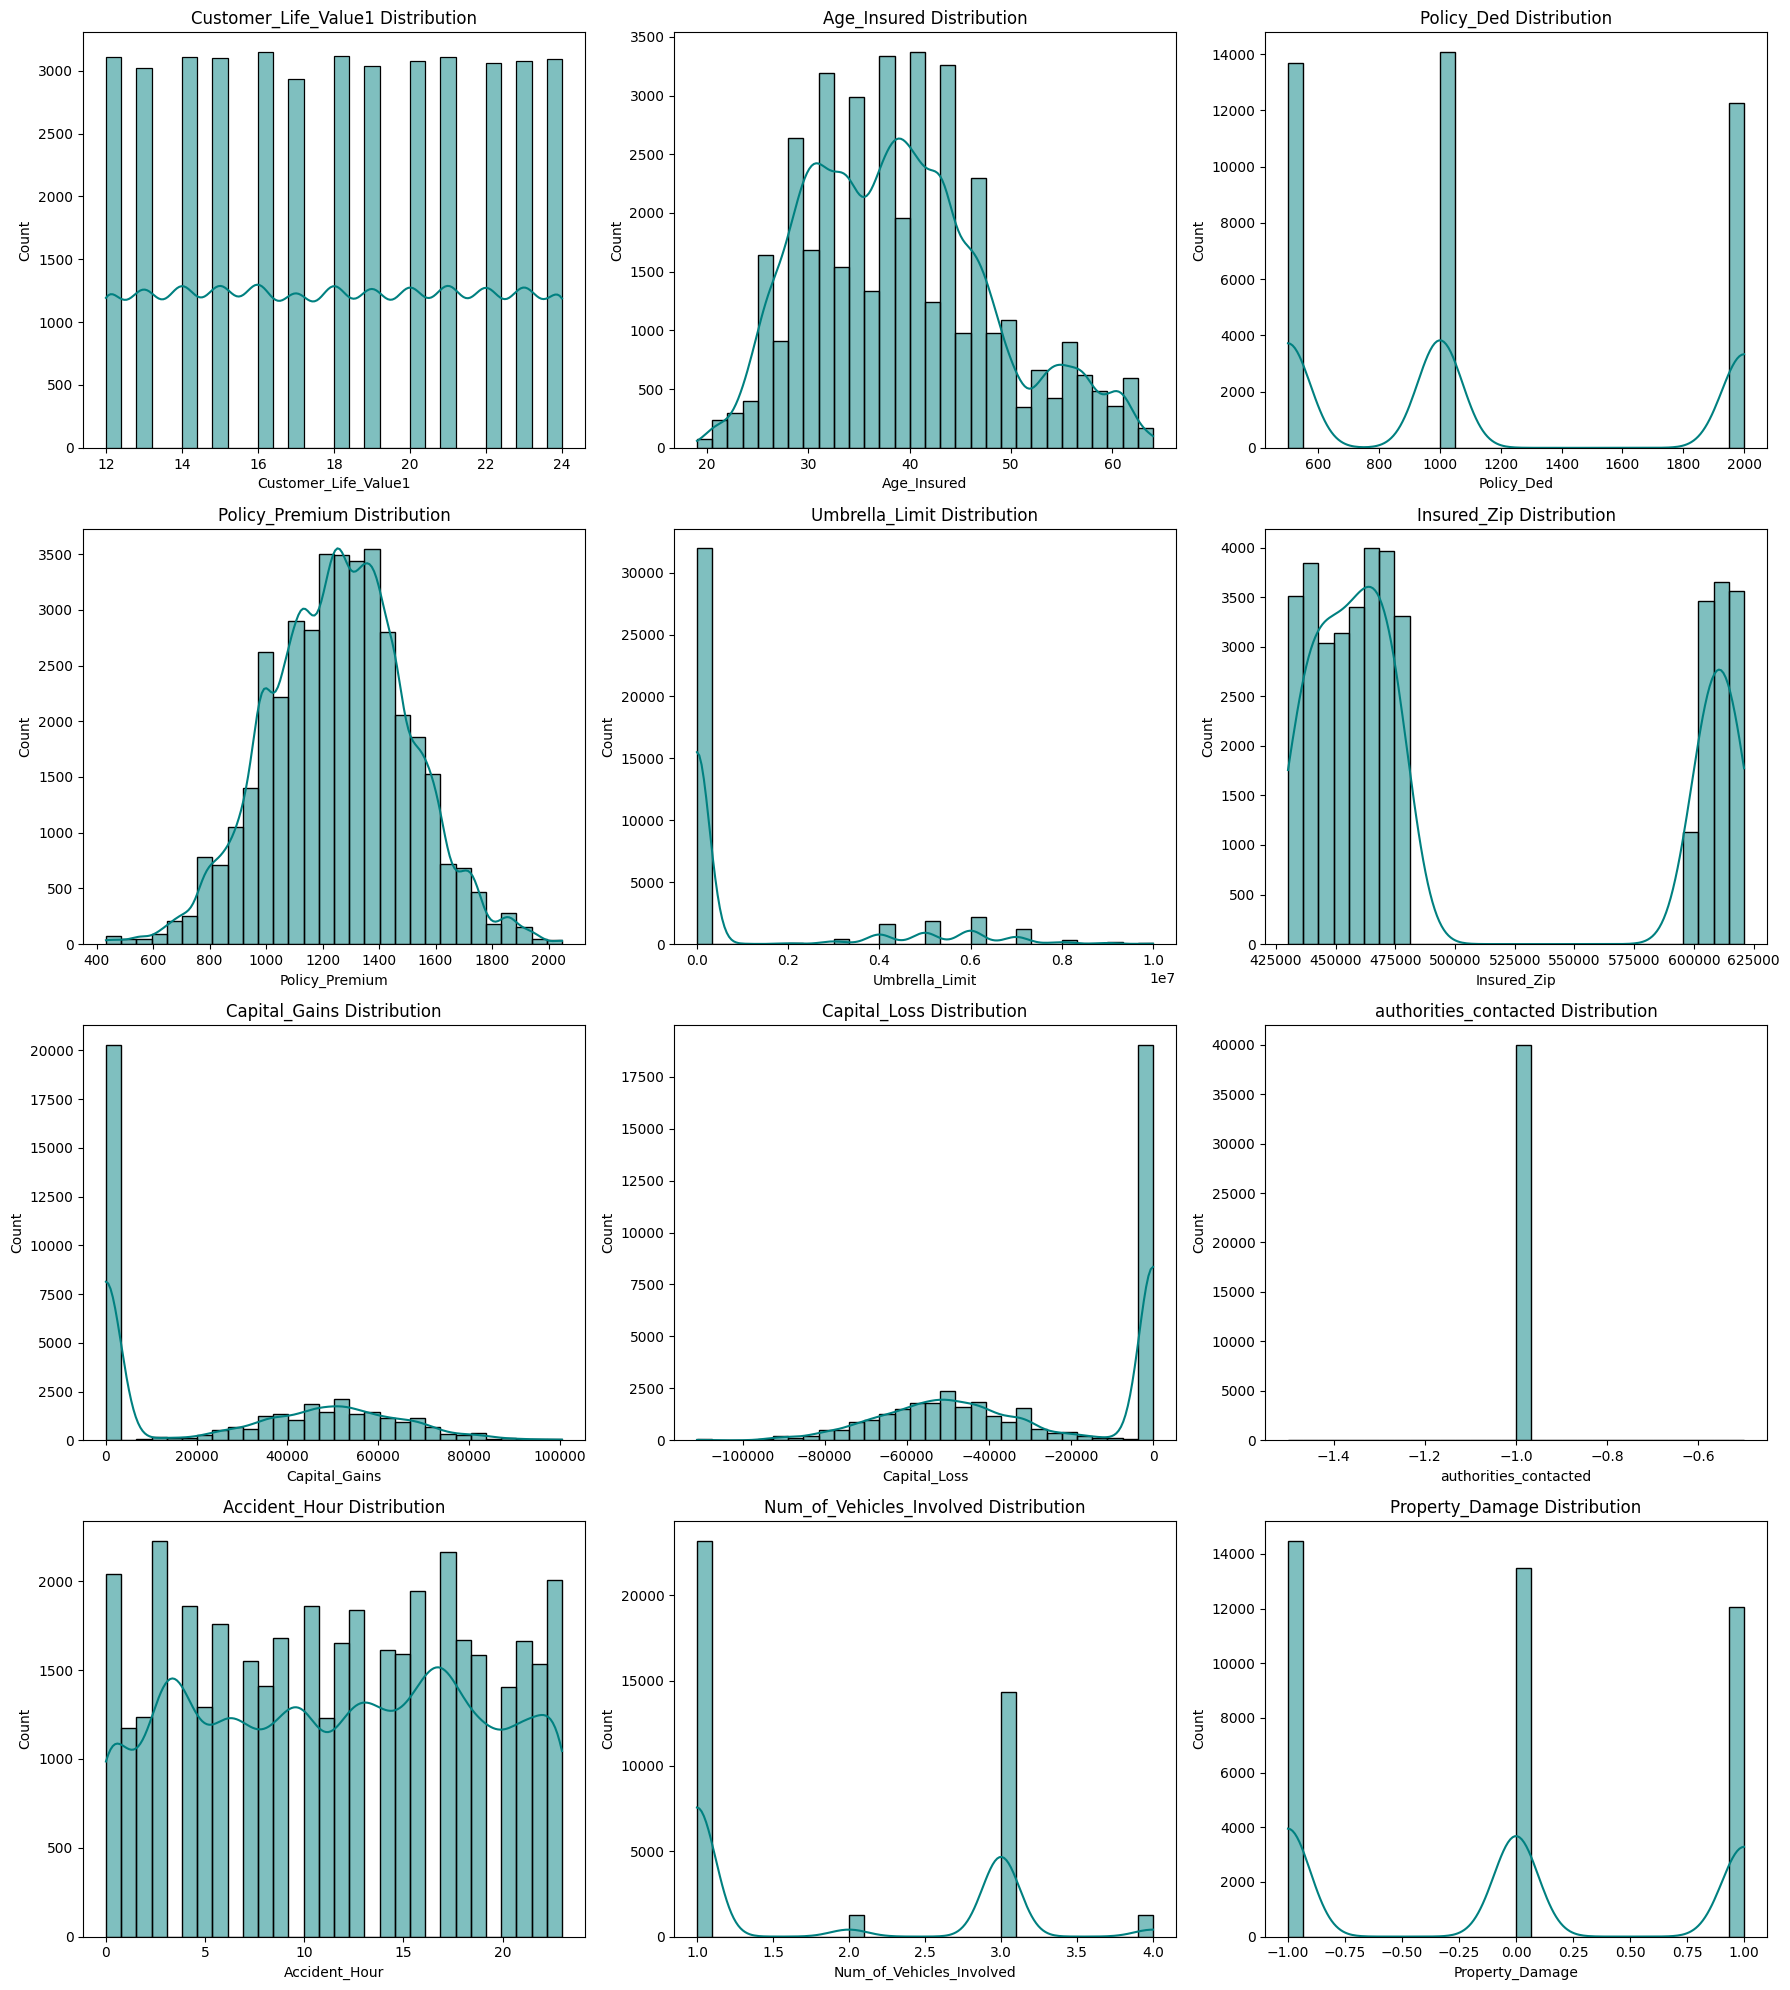

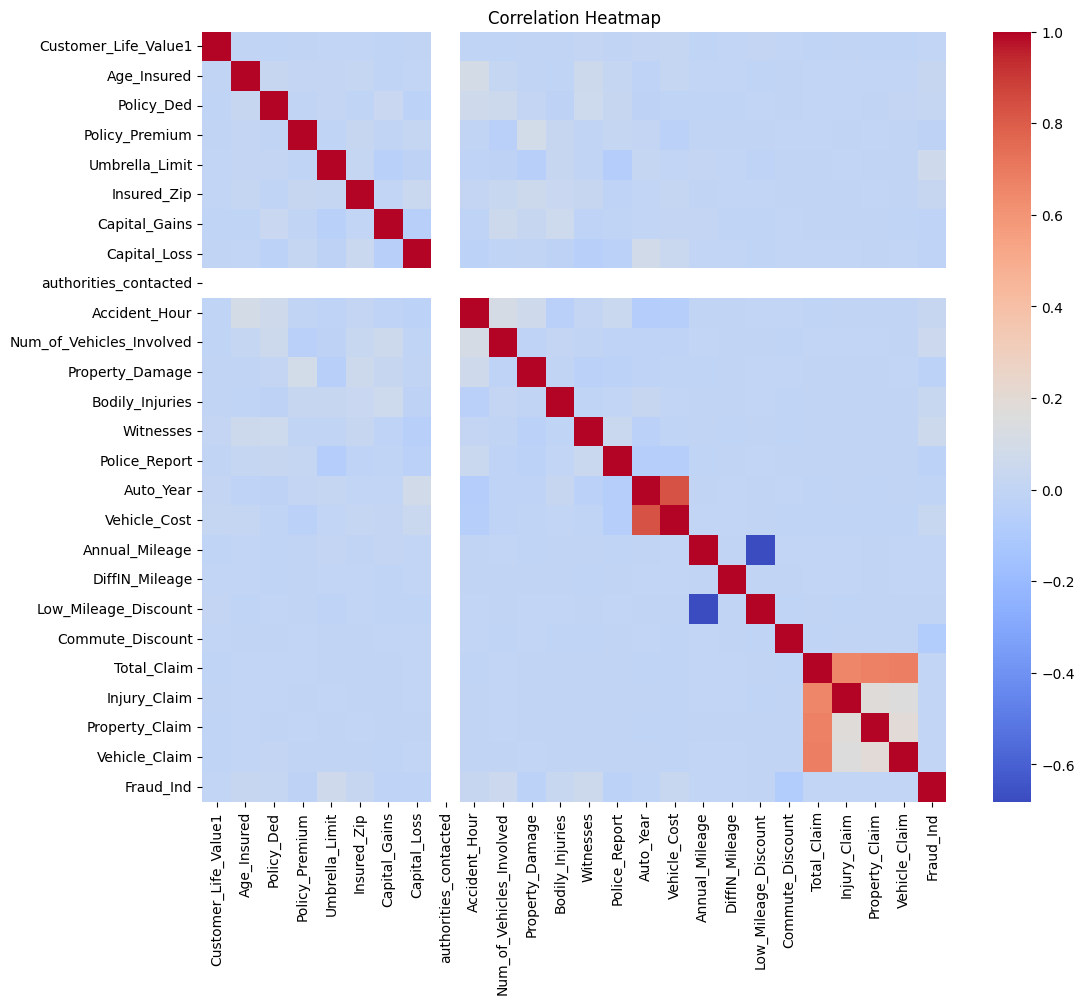

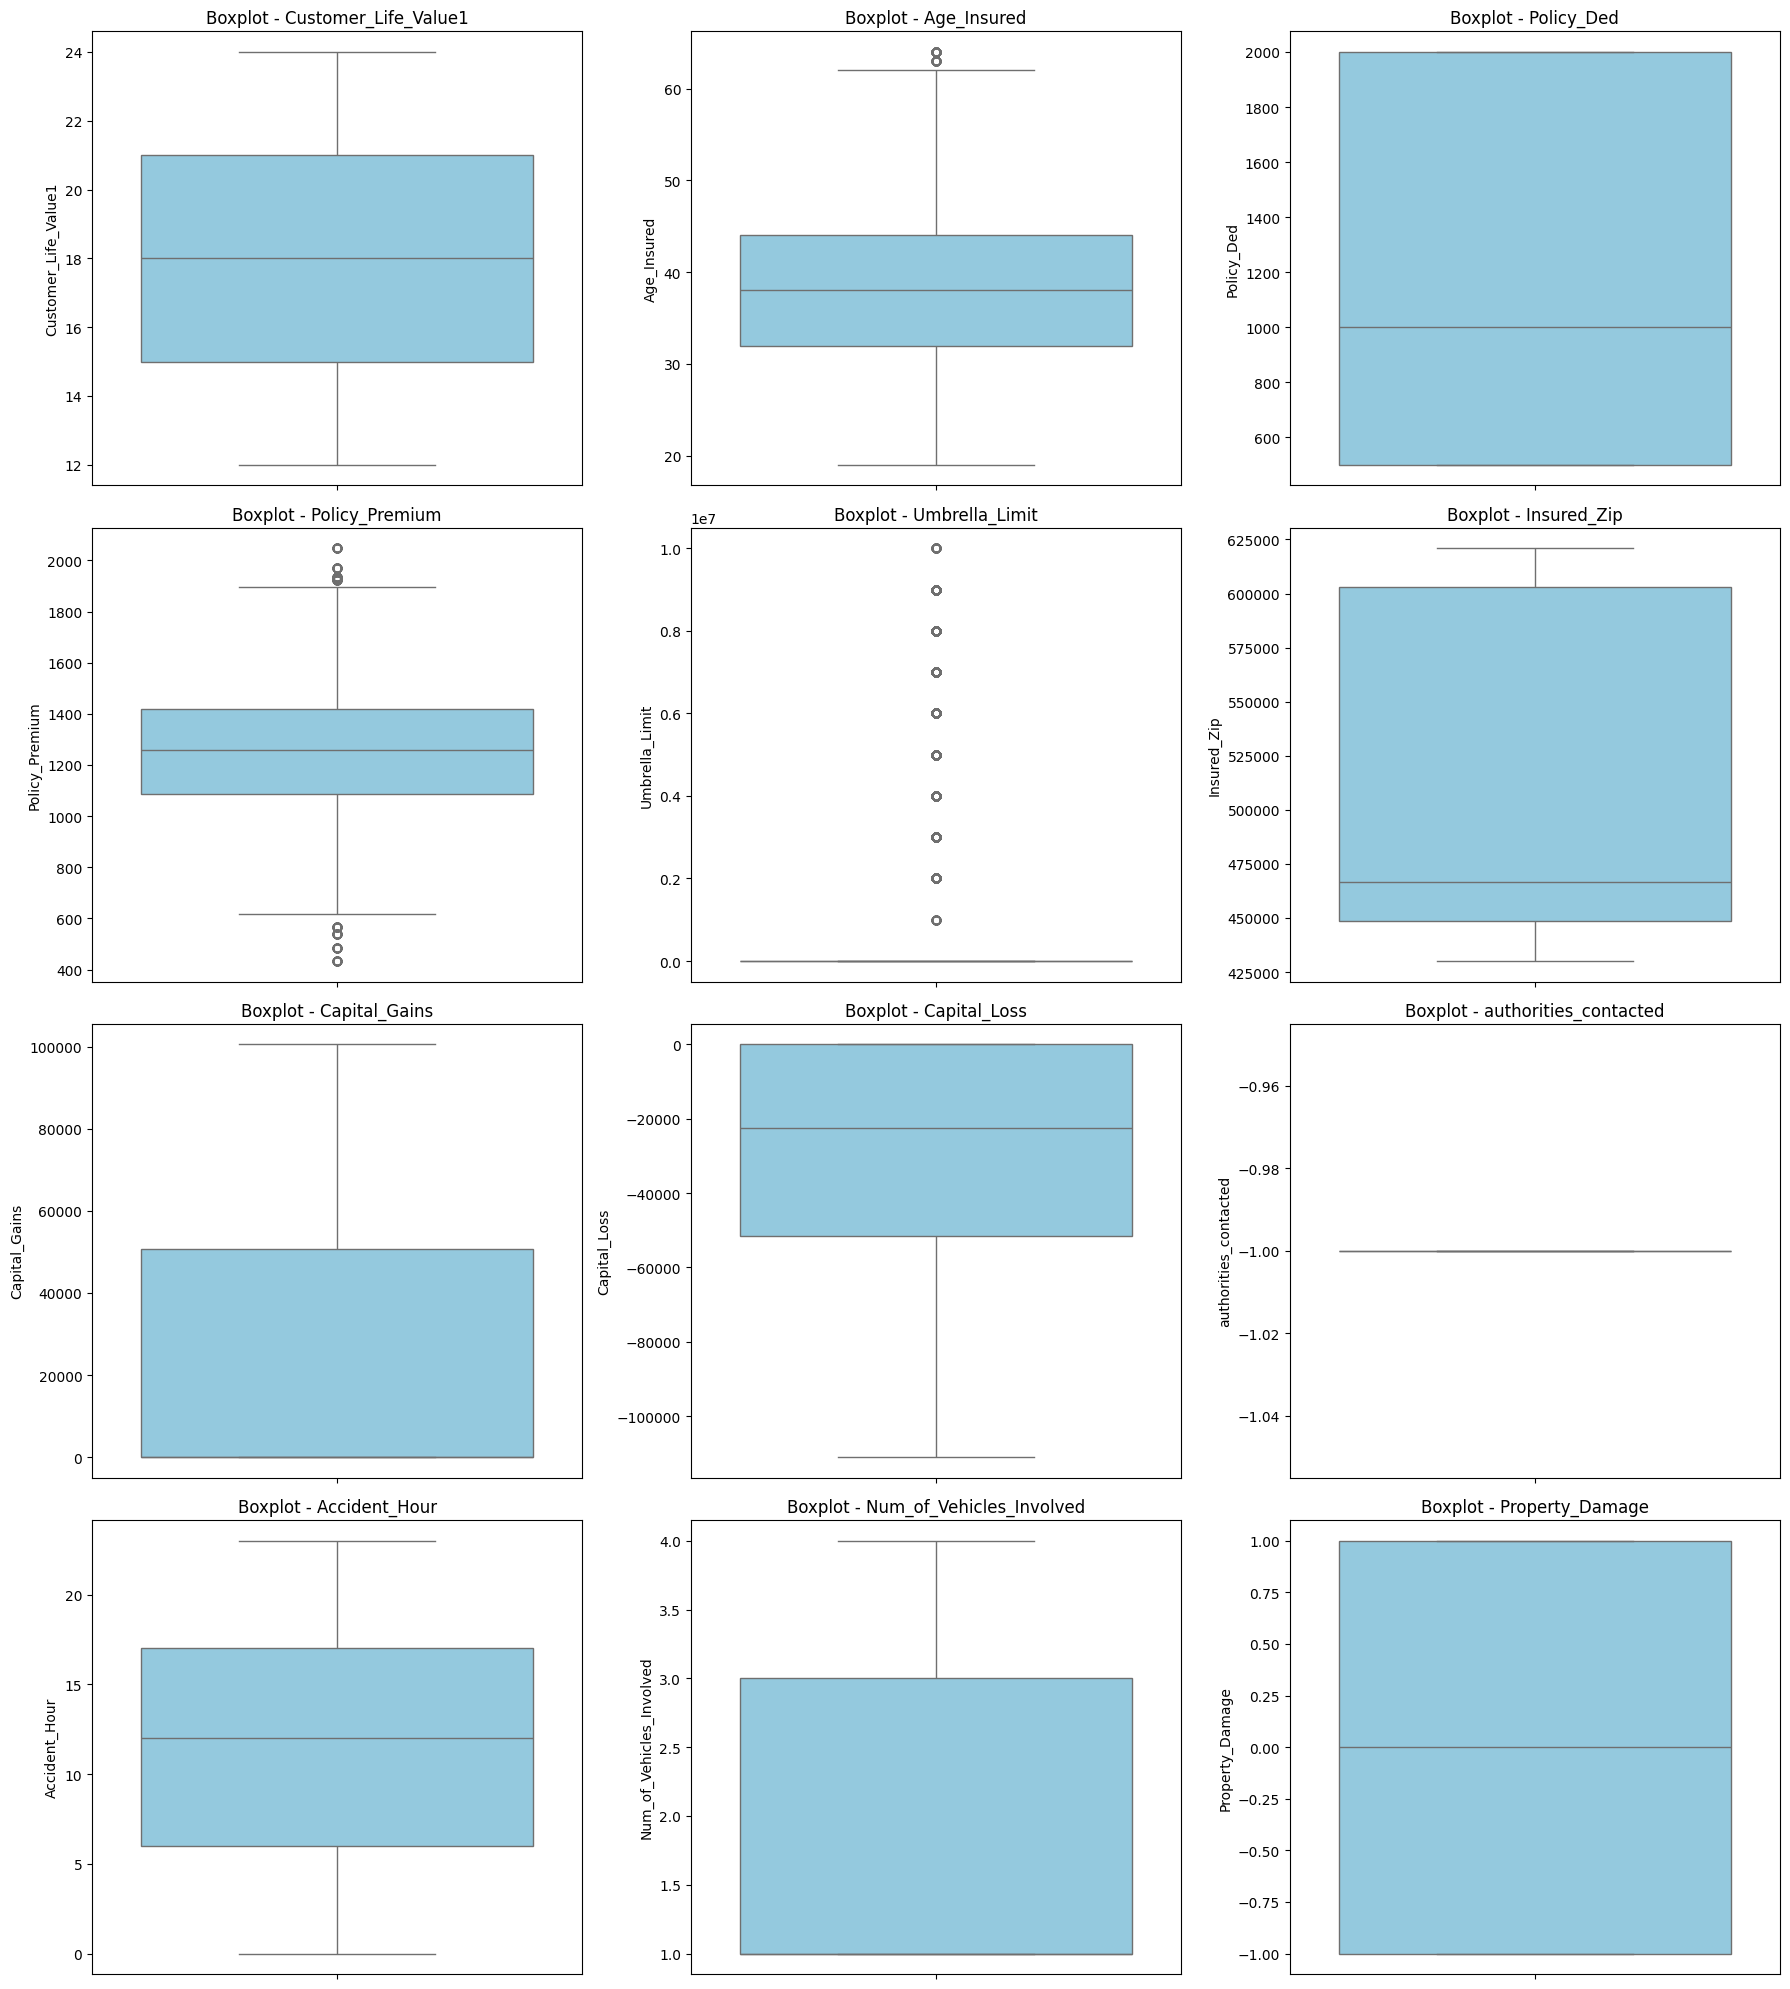

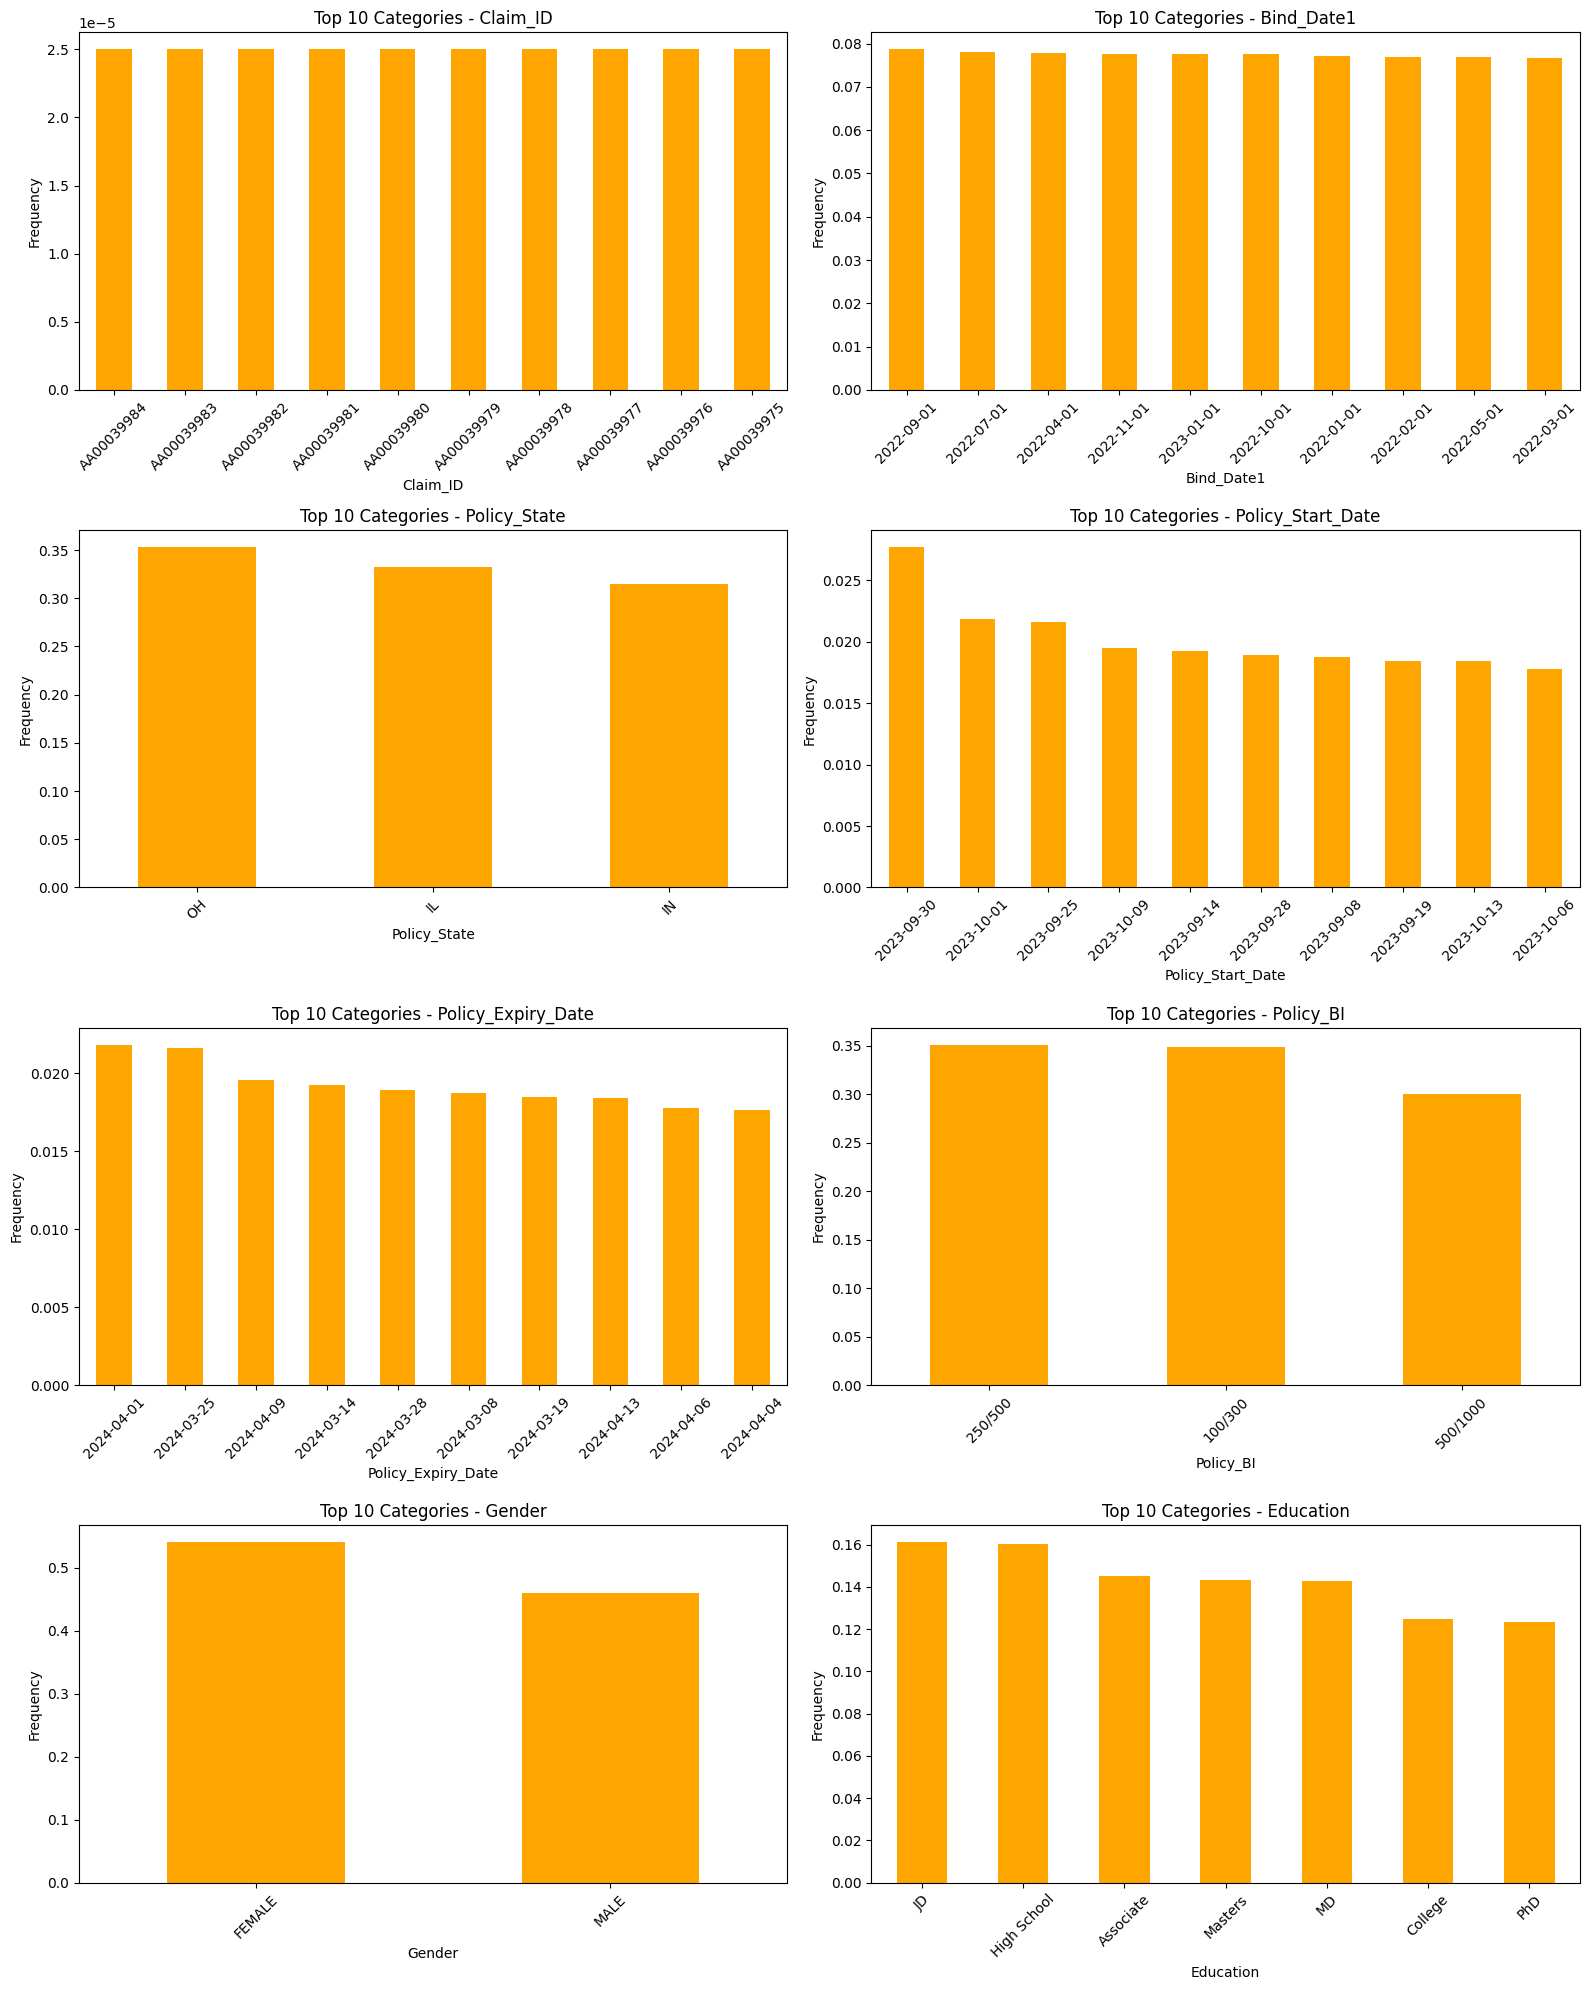

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load cleaned datasets
train_df = pd.read_csv("cleaned_train.csv")
test_df = pd.read_csv("cleaned_test.csv")
val_df = pd.read_csv("cleaned_val.csv")

# Optional: Preview data
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Val shape:", val_df.shape)
print("\nSample:\n", train_df.head())

# ========== 1. Target Variable Distribution ==========
if "Fraud_Ind" in train_df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x="Fraud_Ind", data=train_df, palette="Set2")
    plt.title("Fraud vs Non-Fraud Distribution")
    plt.xlabel("Fraud Indicator")
    plt.ylabel("Number of Claims")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fraud_pct = train_df["Fraud_Ind"].value_counts(normalize=True).round(3) * 100
    print("Fraud Class Distribution (%):")
    print(fraud_pct)

    if fraud_pct.min() < 30:
        print("⚠️ Class imbalance detected — consider SMOTE or ADASYN.")
    else:
        print("✅ Class distribution is balanced.")
else:
    print("❌ 'Fraud_Ind' column not found in training set.")

# ========== 2. Numerical Feature Distributions ==========
num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns
num_cols = [col for col in num_cols if col not in ["Fraud_Ind", "Claim_ID", "Policy_Num"]]

plt.figure(figsize=(18, 20))
for i, col in enumerate(num_cols[:12]):  # show 12 plots max
    plt.subplot(4, 3, i+1)
    sns.histplot(train_df[col], kde=True, bins=30, color='teal')
    plt.title(f"{col} Distribution")
    plt.tight_layout()
plt.show()

# ========== 3. Correlation Heatmap ==========
plt.figure(figsize=(12, 10))
corr = train_df[num_cols + ["Fraud_Ind"]].corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ========== 4. Boxplot for Outlier Detection ==========
plt.figure(figsize=(18, 20))
for i, col in enumerate(num_cols[:12]):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=train_df[col], color="skyblue")
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()
plt.show()

# ========== 5. Categorical Feature Frequency ==========
cat_cols = train_df.select_dtypes(include="object").columns
plt.figure(figsize=(16, 20))
for i, col in enumerate(cat_cols[:8]):
    plt.subplot(4, 2, i+1)
    train_df[col].value_counts(normalize=True).head(10).plot(kind='bar', color='orange')
    plt.title(f"Top 10 Categories - {col}")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


In [ ]:
# import numpy as np

# # 1. Outlier Treatment Using IQR Capping
# def treat_outliers_iqr(df, cols):
#     for col in cols:
#         if col in df.columns:
#             Q1 = df[col].quantile(0.25)
#             Q3 = df[col].quantile(0.75)
#             IQR = Q3 - Q1
#             lower = Q1 - 1.5 * IQR
#             upper = Q3 + 1.5 * IQR
#             df[col] = np.where(df[col] < lower, lower,
#                         np.where(df[col] > upper, upper, df[col]))
#     return df

# outlier_cols = [
#     'Umbrella_Limit', 'Policy_Premium', 'Policy_Ded',
#     'Capital_Gains', 'Capital_Loss', 'Total_Claim',
#     'Injury_Claim', 'Property_Claim', 'Vehicle_Claim',
#     'DiffIN_Mileage', 'Annual_Mileage'
# ]

# train_df = treat_outliers_iqr(train_df, outlier_cols)
# test_df = treat_outliers_iqr(test_df, outlier_cols)
# val_df = treat_outliers_iqr(val_df, outlier_cols)

# print("✅ Outliers treated with IQR capping.")

# # 2. Drop Uninformative Columns
# def drop_uninformative_columns(df, threshold=0.99):
#     to_drop = []
#     for col in df.columns:
#         top_freq = df[col].value_counts(normalize=True, dropna=False).values[0]
#         if top_freq > threshold:
#             to_drop.append(col)
#     return to_drop

# uninformative_cols = list(set(
#     drop_uninformative_columns(train_df) +
#     drop_uninformative_columns(test_df) +
#     drop_uninformative_columns(val_df)
# ))

# # Also drop known ID columns
# drop_id_cols = ['Claim_ID', 'Vehicle_Registration', 'Check_Point']
# drop_all = list(drop_id_cols)

# print(f"🧹 Dropping {len(drop_all)} columns: {drop_all}")

# train_df.drop(columns=drop_all, inplace=True, errors='ignore')
# test_df.drop(columns=drop_all, inplace=True, errors='ignore')
# val_df.drop(columns=drop_all, inplace=True, errors='ignore')

# # Align val_df to train_df columns
# val_df = val_df[[col for col in train_df.columns if col in val_df.columns]]

# # Optional: if you want to be 100% sure all three have same columns in same order
# common_columns = train_df.columns.intersection(test_df.columns).intersection(val_df.columns)
# train_df = train_df[common_columns]
# test_df = test_df[common_columns]
# val_df = val_df[common_columns]

# # Re-check consistency
# assert train_df.columns.equals(test_df.columns)
# assert train_df.columns.equals(val_df.columns)

# print("✅ Column alignment successful.")


# # 3. Recheck column alignment
# print("✅ Final Column Count Check:")
# print(f"Train: {train_df.shape}, Test: {test_df.shape}, Val: {val_df.shape}")
# assert train_df.columns.equals(test_df.columns)
# assert train_df.columns.equals(val_df.columns)




✅ Outliers treated with IQR capping.
🧹 Dropping 3 columns: ['Claim_ID', 'Vehicle_Registration', 'Check_Point']
✅ Column alignment successful.
✅ Final Column Count Check:
Train: (40000, 46), Test: (20000, 46), Val: (10000, 46)


In [13]:
import pandas as pd
import numpy as np

# Load datasets (if not already loaded)
train_df = pd.read_csv("cleaned_train.csv")
test_df = pd.read_csv("cleaned_test.csv")
val_df = pd.read_csv("cleaned_val.csv")

# ✅ Step 1: Outlier Treatment using IQR Capping
def treat_outliers_iqr(df, cols):
    for col in cols:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df[col] = np.where(df[col] < lower, lower,
                        np.where(df[col] > upper, upper, df[col]))
    return df

# Columns to treat for outliers
outlier_cols = [
    'Umbrella_Limit', 'Policy_Premium', 'Policy_Ded',
    'Capital_Gains', 'Capital_Loss', 'Total_Claim',
    'Injury_Claim', 'Property_Claim', 'Vehicle_Claim',
    'DiffIN_Mileage', 'Annual_Mileage'
]

train_df = treat_outliers_iqr(train_df, outlier_cols)
test_df = treat_outliers_iqr(test_df, outlier_cols)
val_df = treat_outliers_iqr(val_df, outlier_cols)

print("✅ Outliers treated using IQR capping.")

# ✅ Step 2: Align columns across datasets (Preserve ALL columns, including ID and target)
target_col = "Fraud_Ind"

# Ensure Fraud_Ind exists in train and test
assert target_col in train_df.columns
assert target_col in test_df.columns

# List of features excluding target
feature_cols = [col for col in train_df.columns if col != target_col]

# Common features among all datasets (excluding target)
common_features = set(feature_cols).intersection(test_df.columns).intersection(val_df.columns)
common_features = sorted(list(common_features))  # maintain column order

# Build aligned versions
train_df = train_df[common_features + [target_col]]
test_df = test_df[common_features + [target_col]]
val_df = val_df[common_features]

# Final shape check
print("\n✅ Final Column Alignment Check:")
print(f"Train shape: {train_df.shape}")
print(f"Test shape:  {test_df.shape}")
print(f"Val shape:   {val_df.shape}")

# Save aligned datasets
train_df.to_csv("Phase3_5_Processed_Train.csv", index=False)
test_df.to_csv("Phase3_5_Processed_Test.csv", index=False)
val_df.to_csv("Phase3_5_Processed_Val.csv", index=False)

print("\n✅ Saved files:")
print("- Phase3_5_Processed_Train.csv")
print("- Phase3_5_Processed_Test.csv")
print("- Phase3_5_Processed_Val.csv")


✅ Outliers treated using IQR capping.

✅ Final Column Alignment Check:
Train shape: (40000, 53)
Test shape:  (20000, 53)
Val shape:   (10000, 52)

✅ Saved files:
- Phase3_5_Processed_Train.csv
- Phase3_5_Processed_Test.csv
- Phase3_5_Processed_Val.csv


Boxplots BEFORE Outlier Treatment:


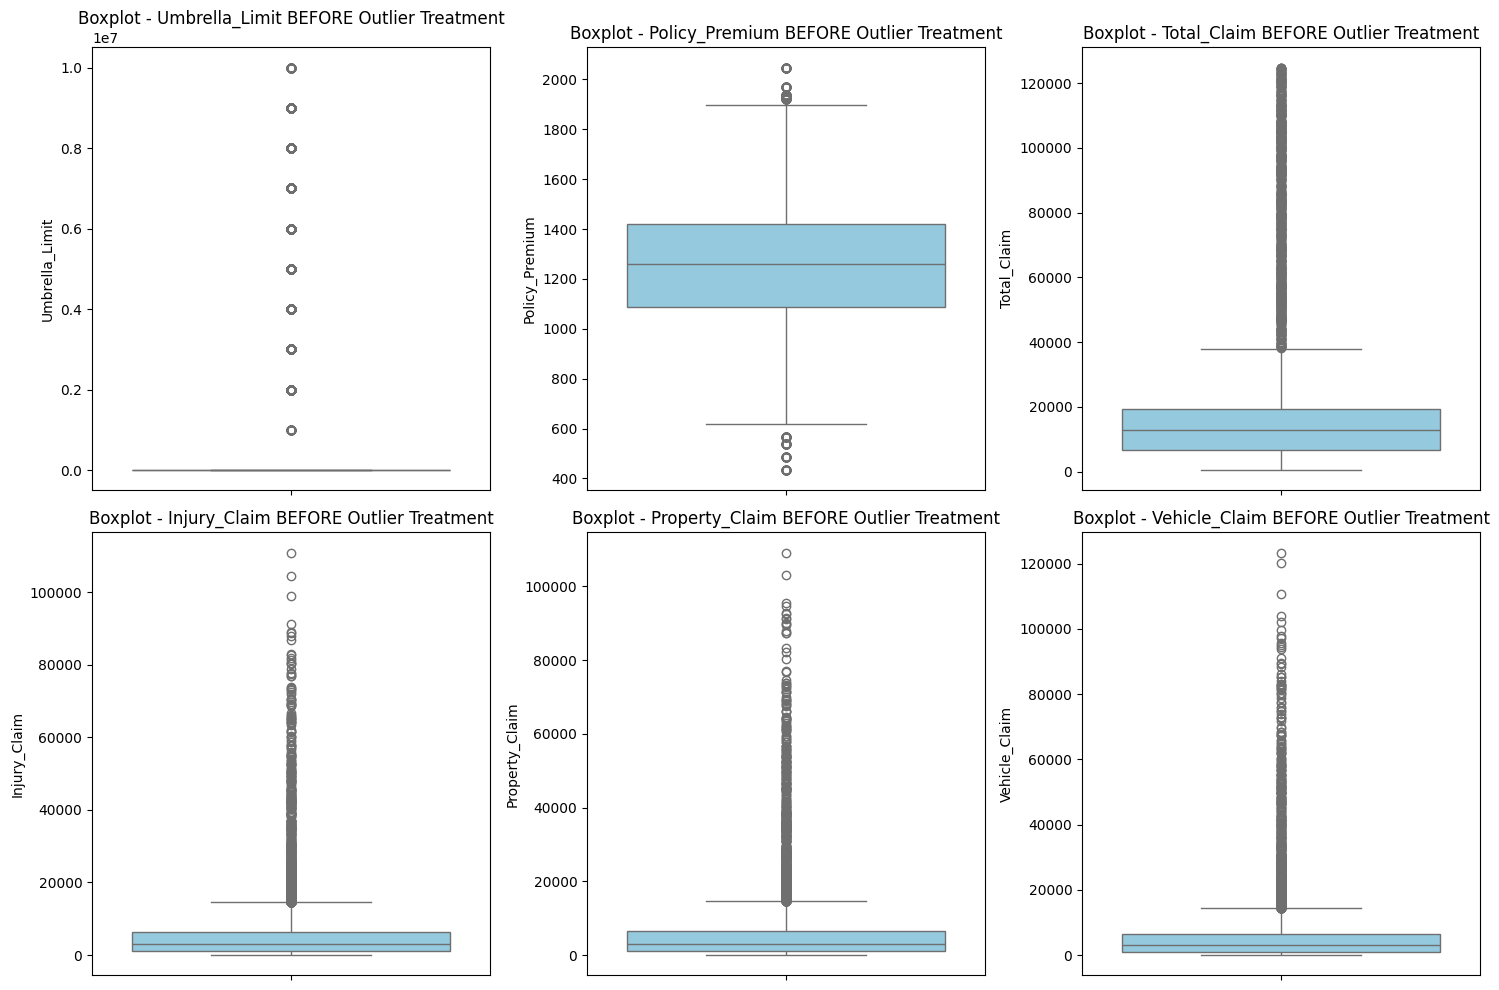


Boxplots AFTER Outlier Treatment:


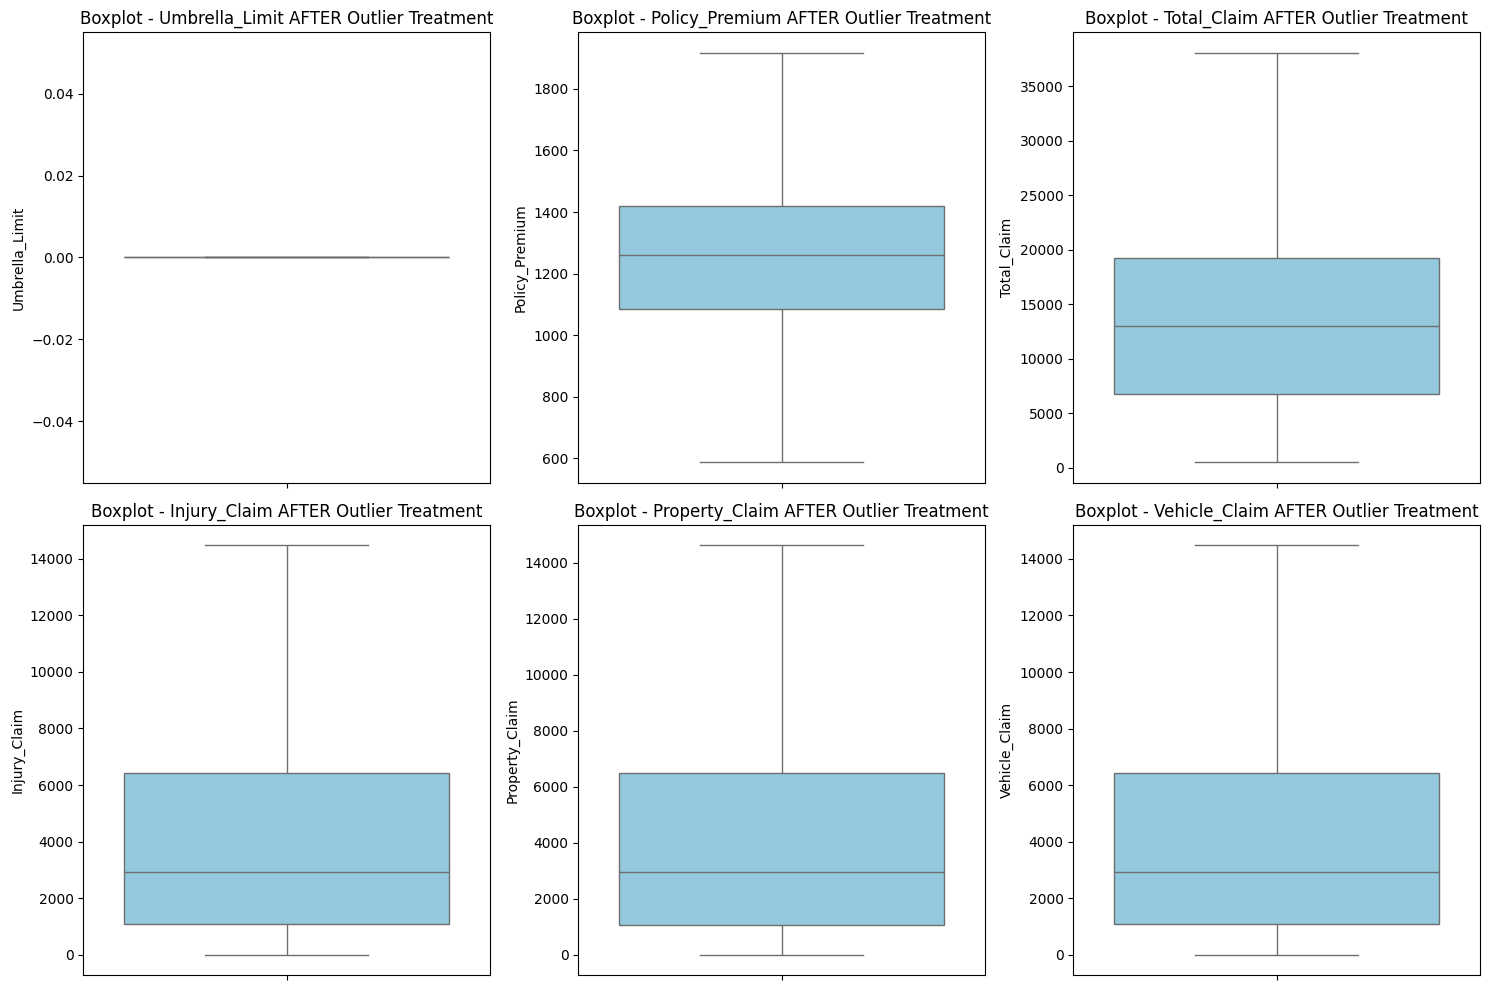

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load original datasets (assuming they are still available or load them again)
# NOTE: If the original dataframes are not available, you might need to reload them
# from the initial CSVs before the first cleaning step.
# For this example, we assume they are still in memory or can be reloaded.

# Reloading original dataframes for comparison (adjust path if needed)
try:
    original_train_df = pd.read_csv("Auto_Insurance_Fraud_Claims_File01.csv")
    original_test_df = pd.read_csv("Auto_Insurance_Fraud_Claims_File02.csv")
    original_val_df = pd.read_csv("Auto_Insurance_Fraud_Claims_File03.csv")
except FileNotFoundError:
    print("Original CSV files not found. Please ensure they are in the correct directory.")
    # Exit or handle the error as appropriate
    exit()


# Define numerical columns to visualize (a subset for clarity)
plot_cols = [
    'Umbrella_Limit', 'Policy_Premium', 'Total_Claim',
    'Injury_Claim', 'Property_Claim', 'Vehicle_Claim'
]

# Function to plot boxplots
def plot_boxplots(df, cols, title_suffix):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(cols):
        if col in df.columns:
            plt.subplot(2, 3, i + 1)
            sns.boxplot(y=df[col], color="skyblue")
            plt.title(f"Boxplot - {col} {title_suffix}")
            plt.tight_layout()
    plt.show()

# Visualize BEFORE outlier treatment
print("Boxplots BEFORE Outlier Treatment:")
plot_boxplots(original_train_df, plot_cols, "BEFORE Outlier Treatment")

# Visualize AFTER outlier treatment (using the dataframes after step 3.5 processing)
print("\nBoxplots AFTER Outlier Treatment:")
plot_boxplots(train_df, plot_cols, "AFTER Outlier Treatment")

In [2]:
import pandas as pd

In [3]:
# Reload cleaned and processed datasets
train_df = pd.read_csv("Phase3_5_Processed_Train.csv", parse_dates=True)
test_df = pd.read_csv("Phase3_5_Processed_Test.csv", parse_dates=True)
val_df = pd.read_csv("Phase3_5_Processed_Val.csv", parse_dates=True)

# Convert to datetime again for feature engineering
date_cols = ["Bind_Date1", "Policy_Start_Date", "Policy_Expiry_Date", "Accident_Date", "Claims_Date", "DL_Expiry_Date"]

for df in [train_df, test_df, val_df]:
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

# Feature: Policy Duration in days
for df in [train_df, test_df, val_df]:
    if "Policy_Start_Date" in df.columns and "Policy_Expiry_Date" in df.columns:
        df["Policy_Duration"] = (df["Policy_Expiry_Date"] - df["Policy_Start_Date"]).dt.days

# Feature: Time between Accident and Claim
for df in [train_df, test_df, val_df]:
    if "Claims_Date" in df.columns and "Accident_Date" in df.columns:
        df["Accident_To_Claim_Days"] = (df["Claims_Date"] - df["Accident_Date"]).dt.days

# Feature: Time since DL expiry from accident
for df in [train_df, test_df, val_df]:
    if "Accident_Date" in df.columns and "DL_Expiry_Date" in df.columns:
        df["DL_Expiry_Before_Accident_Days"] = (df["Accident_Date"] - df["DL_Expiry_Date"]).dt.days

# Drop original date columns (optional)
drop_dates = ["Policy_Start_Date", "Policy_Expiry_Date", "Accident_Date", "Claims_Date", "DL_Expiry_Date", "Bind_Date1"]
train_df.drop(columns=drop_dates, inplace=True, errors='ignore')
test_df.drop(columns=drop_dates, inplace=True, errors='ignore')
val_df.drop(columns=drop_dates, inplace=True, errors='ignore')

# Save updated engineered datasets
train_df.to_csv("Phase4_Engineered_Train.csv", index=False)
test_df.to_csv("Phase4_Engineered_Test.csv", index=False)
val_df.to_csv("Phase4_Engineered_Val.csv", index=False)

print("✅ Feature Engineering complete and files saved.")


✅ Feature Engineering complete and files saved.


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load engineered dataset
train_df = pd.read_csv("Phase4_Engineered_Train.csv")

# Separate target and features
target_col = "Fraud_Ind"
X = train_df.drop(columns=[target_col])
y = train_df[target_col]

# Encode categorical columns
cat_cols = X.select_dtypes(include="object").columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le


In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution
print("✅ Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


✅ Class distribution after SMOTE:
Fraud_Ind
0    30120
1    30120
Name: count, dtype: int64


In [10]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_resampled, y_resampled, discrete_features='auto', random_state=42)
mi_df = pd.DataFrame({"Feature": X.columns, "MI_Score": mi_scores}).sort_values(by="MI_Score", ascending=False)
top_mi_features = mi_df.head(5)["Feature"].tolist()

print("\n🎯 Top 5 Features by Mutual Information:")
print(top_mi_features)



🎯 Top 5 Features by Mutual Information:
['Policy_Num', 'Accident_Location', 'Insured_Zip', 'Policy_Premium', 'DL_Expiry_Before_Accident_Days']


In [11]:
from sklearn.feature_selection import f_classif

f_scores, _ = f_classif(X_resampled, y_resampled)
f_df = pd.DataFrame({"Feature": X.columns, "F_Score": f_scores}).sort_values(by="F_Score", ascending=False)
top_f_features = f_df.head(5)["Feature"].tolist()

print("\n🎯 Top 5 Features by F-test (ANOVA):")
print(top_f_features)



🎯 Top 5 Features by F-test (ANOVA):
['Accident_Severity', 'Collision_Type', 'Low_Mileage_Discount', 'Commute_Discount', 'Garage_Location']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [14 39 45] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [12]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_resampled)
chi2_scores, _ = chi2(X_scaled, y_resampled)
chi2_df = pd.DataFrame({"Feature": X.columns, "Chi2_Score": chi2_scores}).sort_values(by="Chi2_Score", ascending=False)
top_chi2_features = chi2_df.head(5)["Feature"].tolist()

print("\n🎯 Top 5 Features by Chi-square Test:")
print(top_chi2_features)



🎯 Top 5 Features by Chi-square Test:
['Accident_Severity', 'Low_Mileage_Discount', 'Commute_Discount', 'Garage_Location', 'Collision_Type']


In [13]:
# ⚠️ Run this once if Boruta is not installed
# !pip install boruta

from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
boruta_selector = BorutaPy(estimator=rf, n_estimators='auto', verbose=0, random_state=42)
boruta_selector.fit(X_resampled.values, y_resampled.values)

# Get selected features
boruta_selected = X.columns[boruta_selector.support_].tolist()

# Rank selected by feature importance
rf.fit(X_resampled[boruta_selected], y_resampled)
rf_importances = pd.Series(rf.feature_importances_, index=boruta_selected).sort_values(ascending=False)
top_boruta_features = rf_importances.head(5).index.tolist()

print("\n🎯 Top 5 Features by Boruta:")
print(top_boruta_features)



🎯 Top 5 Features by Boruta:
['Accident_Severity', 'Hobbies', 'Policy_Num', 'Insured_Zip', 'DL_Expiry_Before_Accident_Days']


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Dictionary of top-5 feature sets from each method
feature_sets = {
    "Mutual Info": top_mi_features,
    "F-test": top_f_features,
    "Chi2": top_chi2_features,
    "Boruta": top_boruta_features
}

# Store evaluation metrics
results = {}

# Loop through each feature set
for method, features in feature_sets.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled[features], y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    results[method] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="F1-Score", ascending=False)

# Show the comparison table
print("\n📊 Feature Selection Method Comparison:")
print(results_df.round(4))

# Get best method and its features
best_method = results_df.index[0]
best_features = feature_sets[best_method]

# Save the best features to CSV
best_feat_df = pd.DataFrame({"Top_5_Features": best_features})
best_feat_df.to_csv("Best_Top5_Features.csv", index=False)

print(f"\n🏆 Best Feature Selection Method: {best_method}")
print("✅ Best top 5 features saved to 'Best_Top5_Features.csv'")



📊 Feature Selection Method Comparison:
             Accuracy  Precision  Recall  F1-Score  ROC-AUC
Mutual Info    1.0000       1.00  1.0000    1.0000   1.0000
Boruta         1.0000       1.00  1.0000    1.0000   1.0000
F-test         0.7746       0.83  0.6906    0.7539   0.8188
Chi2           0.7746       0.83  0.6906    0.7539   0.8188

🏆 Best Feature Selection Method: Mutual Info
✅ Best top 5 features saved to 'Best_Top5_Features.csv'


In [16]:
print(f"✅ Best top 5 features saved to 'Best_Top5_Features:{best_features}")

✅ Best top 5 features saved to 'Best_Top5_Features:['Policy_Num', 'Accident_Location', 'Insured_Zip', 'Policy_Premium', 'DL_Expiry_Before_Accident_Days']


In [27]:
!pip install xgboost lightgbm catboost --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


In [28]:
# Load validation data (only features, no target column)
val_raw = pd.read_csv('/content/Phase4_Engineered_Val.csv')

# Select and process the same 5 features used for training
val_raw = val_raw[['Policy_Num', 'Accident_Location', 'Insured_Zip', 'Policy_Premium', 'DL_Expiry_Before_Accident_Days']]

# Label encode high-cardinality columns same as train
for col in ['Policy_Num', 'Insured_Zip']:
    le = LabelEncoder()
    le.fit(pd.concat([X_train[col], X_test[col]]))  # fit on train+test for unseen val categories
    val_raw[col] = le.transform(val_raw[col])

# Predict using each trained pipeline
val_predictions = pd.DataFrame()
val_predictions['Index'] = val_raw.index

print("\nPredicting on Unseen Validation Data...\n")

for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('classifier', model)
    ])
    # Refit the model to ensure consistent preprocessing
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(val_raw)
    y_prob = pipe.predict_proba(val_raw)[:, 1] if hasattr(pipe.named_steps['classifier'], "predict_proba") else None

    val_predictions[f'{name}_Prediction'] = y_pred
    if y_prob is not None:
        val_predictions[f'{name}_Probability'] = y_prob

# Show preview of predictions
print(val_predictions.head())

# Optional: Save to CSV
val_predictions.to_csv("Validation_Predictions_All_Models.csv", index=False)
print("\nValidation predictions saved to 'Validation_Predictions_All_Models.csv'")


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:12:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 9880, number of negative: 30120
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6494
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 2997
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247000 -> initscore=-1.114677
[LightGBM] [Info] Start training from score -1.114677


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Accuracy,Precision,Recall,Specificity,F1-Score,ROC-AUC,MCC,Log Loss
Model,,,,,,,,
Logistic Regression,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.0239
Decision Tree,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.0000
Random Forest,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.0000
Gradient Boosting,0.7360,1.0,0.0075,1.0,0.0149,0.9148,0.0744,0.4879
AdaBoost,0.7360,1.0,0.0075,1.0,0.0149,0.5966,0.0744,0.5711
Naive Bayes,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.0000
Support Vector Machine,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.0000
XGBoost,0.9956,1.0,0.9833,1.0,0.9916,1.0000,0.9886,0.2486
LightGBM,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.1687


In [30]:
# You must have dictionaries with training and testing scores for each model.
# Assuming you collected this earlier — if not, I’ll show how to compute it too.

training_scores = {
    'Logistic Regression': 1.0,
    'Decision Tree': 1.0,
    'Random Forest': 1.0,
    'Gradient Boosting': 1.0,
    'AdaBoost': 1.0,
    'Naive Bayes': 1.0,
    'Support Vector Machine': 1.0,
    'XGBoost': 1.0,
    'LightGBM': 1.0,
    'CatBoost': 1.0
}

testing_scores = {
    'Logistic Regression': 1.0,
    'Decision Tree': 1.0,
    'Random Forest': 1.0,
    'Gradient Boosting': 0.7360,
    'AdaBoost': 0.7360,
    'Naive Bayes': 1.0,
    'Support Vector Machine': 1.0,
    'XGBoost': 0.9956,
    'LightGBM': 1.0,
    'CatBoost': 1.0
}

# Calculate overfitting gap
overfit_df = pd.DataFrame({
    'Train Accuracy': training_scores,
    'Test Accuracy': testing_scores
})
overfit_df['Overfitting Gap'] = overfit_df['Train Accuracy'] - overfit_df['Test Accuracy']

# Show sorted models with highest overfitting at top
print("\n📊 Overfitting Detection (Higher gap = more overfitting):\n")
print(overfit_df.sort_values(by='Overfitting Gap', ascending=False))



📊 Overfitting Detection (Higher gap = more overfitting):

                        Train Accuracy  Test Accuracy  Overfitting Gap
AdaBoost                           1.0         0.7360           0.2640
Gradient Boosting                  1.0         0.7360           0.2640
XGBoost                            1.0         0.9956           0.0044
Logistic Regression                1.0         1.0000           0.0000
Decision Tree                      1.0         1.0000           0.0000
Random Forest                      1.0         1.0000           0.0000
Naive Bayes                        1.0         1.0000           0.0000
Support Vector Machine             1.0         1.0000           0.0000
LightGBM                           1.0         1.0000           0.0000
CatBoost                           1.0         1.0000           0.0000


In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Enter your evaluation metrics manually into a DataFrame
metrics_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting',
              'AdaBoost', 'Naive Bayes', 'Support Vector Machine', 'XGBoost',
              'LightGBM', 'CatBoost'],
    'Accuracy': [1.0000, 1.0000, 1.0000, 0.7360, 0.7360, 1.0000, 1.0000, 0.9956, 1.0000, 1.0000],
    'Precision': [1.0]*10,
    'Recall': [1.0000, 1.0000, 1.0000, 0.0075, 0.0075, 1.0000, 1.0000, 0.9833, 1.0000, 1.0000],
    'Specificity': [1.0]*10,
    'F1-Score': [1.0000, 1.0000, 1.0000, 0.0149, 0.0149, 1.0000, 1.0000, 0.9916, 1.0000, 1.0000],
    'ROC-AUC': [1.0000, 1.0000, 1.0000, 0.9148, 0.5966, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
    'MCC': [1.0000, 1.0000, 1.0000, 0.0744, 0.0744, 1.0000, 1.0000, 0.9886, 1.0000, 1.0000],
    'Log Loss': [0.0239, 0.0000, 0.0000, 0.4879, 0.5711, 0.0000, 0.0000, 0.2486, 0.1687, 0.0697]
}

df_metrics = pd.DataFrame(metrics_data)
df_metrics.set_index('Model', inplace=True)

# Step 2: Invert Log Loss (since lower is better) and normalize all metrics (0-1 scale)
metrics_to_normalize = df_metrics.columns.tolist()
df_norm = df_metrics.copy()

scaler = MinMaxScaler()
# Invert Log Loss for scoring purposes
df_norm['Log Loss'] = df_norm['Log Loss'].max() - df_norm['Log Loss']

# Normalize
df_norm[metrics_to_normalize] = scaler.fit_transform(df_norm[metrics_to_normalize])

# Step 3: Compute overall score (average of all normalized metrics)
df_norm['Overall Score'] = df_norm.mean(axis=1)

# Step 4: Sort and print best model
best_model = df_norm['Overall Score'].idxmax()
print(f"\n🏆 Best Model Based on All Metrics: **{best_model}**\n")

print(df_norm.sort_values(by='Overall Score', ascending=False)[['Overall Score']])



🏆 Best Model Based on All Metrics: **Decision Tree**

                        Overall Score
Model                                
Decision Tree                0.750000
Random Forest                0.750000
Support Vector Machine       0.750000
Naive Bayes                  0.750000
Logistic Regression          0.744769
CatBoost                     0.734744
LightGBM                     0.713076
XGBoost                      0.688795
Gradient Boosting            0.116810
AdaBoost                     0.000000


In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# === Step 1: Load validation data (unseen, no target) ===
val_data_top5 = pd.read_csv('/content/Phase4_Engineered_Val.csv')[
    ['Policy_Num', 'Accident_Location', 'Insured_Zip', 'Policy_Premium', 'DL_Expiry_Before_Accident_Days']
]

# === Step 2: Confirm row count ===
assert val_data_top5.shape[0] == 10000, f"Row count mismatch: Expected 10,000 but got {val_data_top5.shape[0]}"

# === Step 3: Label Encode categorical features ===
for col in ['Policy_Num', 'Insured_Zip']:
    le = LabelEncoder()
    le.fit(pd.concat([X_train[col], X_test[col]]))  # Fit on known training + testing data
    val_data_top5[col] = le.transform(val_data_top5[col])

# === Step 4: Create pipeline with best model (Decision Tree) ===
best_model = DecisionTreeClassifier(random_state=42)
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', best_model)
])
pipe.fit(X_train, y_train)

# === Step 5: Predict ===
val_pred_labels = pipe.predict(val_data_top5)
val_pred_probs = pipe.predict_proba(val_data_top5)[:, 1]

# === Step 6: Store results and validate shape ===
val_results = val_data_top5.copy()
val_results['Predicted_Label'] = val_pred_labels
val_results['Prediction_Probability'] = val_pred_probs

# === Step 7: Confirm row count before saving ===
assert val_results.shape[0] == 10000, f"Prediction row mismatch: Expected 10,000 but got {val_results.shape[0]}"

# === Step 8: Save predictions ===
val_results.to_csv("Validation_Predictions_By_DecisionTree.csv", index=False)
print("\n✅ Predictions completed and saved to 'Validation_Predictions_By_DecisionTree.csv'")
print(f"✅ File contains {val_results.shape[0]} rows and {val_results.shape[1]} columns")
print("\n🔍 Sample predictions:")
print(val_results.head())



✅ Predictions completed and saved to 'Validation_Predictions_By_DecisionTree.csv'
✅ File contains 10000 rows and 7 columns

🔍 Sample predictions:
   Policy_Num Accident_Location  Insured_Zip  Policy_Premium  \
0          52      4546 Tree St          564          708.64   
1         873    2003 Maple Hwy          662         1057.77   
2         976   9484 Pine Drive          653         1384.51   
3         143       7819 Oak St          594          986.53   
4         419  3066 Francis Ave          713         1315.68   

   DL_Expiry_Before_Accident_Days  Predicted_Label  Prediction_Probability  
0                            -440                0                     0.0  
1                            -563                0                     0.0  
2                            -738                0                     0.0  
3                            -543                0                     0.0  
4                            -603                0                     0.0  


In [34]:
val_data_top5

,Policy_Num,Accident_Location,Insured_Zip,Policy_Premium,DL_Expiry_Before_Accident_Days
0,52,4546 Tree St,564,708.64,-440
1,873,2003 Maple Hwy,662,1057.77,-563
2,976,9484 Pine Drive,653,1384.51,-738
3,143,7819 Oak St,594,986.53,-543
4,419,3066 Francis Ave,713,1315.68,-603
...,...,...,...,...,...
9995,768,3289 Britain Drive,714,1075.18,-696
9996,413,1840 Embaracadero Ave,178,1025.54,-644
9997,972,8381 Solo Hwy,955,1167.30,-584
9998,772,6751 Pine Ridge,165,1055.53,-502


In [39]:
import joblib

# Save the entire pipeline (recommended)
joblib.dump(pipe, "fraud_detection_pipeline.pkl")

# Optionally, save the model only
joblib.dump(best_model, "decision_tree_model.pkl")

# If you used any custom encoders/preprocessors separately, save them too
# For example, label_encoders for categorical columns:
joblib.dump(label_encoders, "label_encoders.pkl")

print("✅ Model and pipeline saved as .pkl files.")


✅ Model and pipeline saved as .pkl files.
